# RX KODE HOOK OFDM based on standard 7A- Receiver

#Rx side

In [22]:
import random
import matplotlib.pyplot as plt
import numpy as np


# Threshold awal
key_start_threshold = 30

# Data awal untuk all_value_intensity
data_96 =  [181, 245, 189, 213, 221, 85, 69, 109, 61, 61, 245, 173, 173, 237, 245, 125, 53, 125, 101, 85, 221, 189, 221, 173, 245, 125, 101, 85, 53, 69, 221, 173, 181, 197, 189, 85, 53, 93, 69, 101, 181, 173, 245, 245, 221, 53, 125, 53, 53, 101, 53, 53, 101, 101, 125, 173, 221, 221, 173, 245, 125, 101, 53, 93, 125, 245, 189, 189, 221, 197, 53, 101, 61, 53, 125, 173, 221, 181, 173, 189, 61, 69, 53, 125, 53, 173, 189, 205, 245, 221, 245, 213, 173, 189, 245, 53, 125, 85, 61, 125, 181, 229, 245, 245, 173, 53, 61, 109, 61, 69, 245, 173, 181, 205, 173, 69, 101, 125, 53, 101, 245, 173, 205, 173, 173, 93, 85, 69, 101, 101, 53, 125, 125, 101, 53, 213, 173, 221, 173, 173, 101, 101, 125, 53, 101, 245, 221, 245, 173, 173, 221, 189, 221, 173, 221, 125, 53, 125, 101, 69, 245, 221, 245, 181, 173, 101, 53, 61, 125, 101, 53, 61, 125, 101, 77, 181, 245, 173, 245, 245, 53, 77, 53, 93, 61, 213, 229, 173, 173, 173, 205, 229, 173, 173, 173, 53, 53, 53, 53, 53]

In [23]:
##Output untuk mapping value dari Tx ke Rx
# mapping = {
#     "high": {200: 173, 201: 181, 202: 189, 203: 197, 204: 205,
#              205: 213, 206: 221, 207: 229, 208: 237, 209: 245},
#     "low": {70: 53, 71: 61, 72: 69, 73: 77, 74: 85,
#             75: 93, 76: 101, 77: 109, 78: 117, 79: 125}
# }



# def reverse_map_value(mapped_value):
#     for mapping_type in ["high", "low"]:
#         for key, value in mapping[mapping_type].items():
#             if value == mapped_value:
#                 return key
#     return None  # Jika tidak ditemukan di kedua mapping

# reversed_values = [reverse_map_value(value) for value in data_96]
# print("Reversed values:\n", reversed_values)


# Image Processing - Mapping data
#Kode dibawah ini digunakan untuk mapping data real-time

#kode dibawah adalah second code untuk jaga jaga dibagian mapping data ~~~ untuk klipping basic

In [24]:
# # Data input dari transmitter (HOOK OFDM DATA 2nd mapping)
# # received_data =  [181, 245, 189, 213, 221, 85, 69, 109, 61, 61, 245, 173, 173, 237, 245, 125, 53, 125, 101, 85, 221, 189, 221, 173, 245, 125, 101, 85, 53, 69, 221, 173, 181, 197, 189, 85, 53, 93, 69, 101, 181, 173, 245, 245, 221, 53, 125, 53, 53, 101, 53, 53, 101, 101, 125, 173, 221, 221, 173, 245, 125, 101, 53, 93, 125, 245, 189, 189, 221, 197, 53, 101, 61, 53, 125, 173, 221, 181, 173, 189, 61, 69, 53, 125, 53, 173, 189, 205, 245, 221, 245, 213, 173, 189, 245, 53, 125, 85, 61, 125, 181, 229, 245, 245, 173, 53, 61, 109, 61, 69, 245, 173, 181, 205, 173, 69, 101, 125, 53, 101, 245, 173, 205, 173, 173, 93, 85, 69, 101, 101, 53, 125, 125, 101, 53, 213, 173, 221, 173, 173, 101, 101, 125, 53, 101, 245, 221, 245, 173, 173, 221, 189, 221, 173, 221, 125, 53, 125, 101, 69, 245, 221, 245, 181, 173, 101, 53, 61, 125, 101, 53, 61, 125, 101, 77, 181, 245, 173, 245, 245, 53, 77, 53, 93, 61, 213, 229, 173, 173, 173, 205, 229, 173, 173, 173, 53, 53, 53, 53, 53]


# # Mapping yang digunakan di transmitter
# high_mapping = {200: 173, 201: 181, 202: 189, 203: 197, 204: 205,
#                 205: 213, 206: 221, 207: 229, 208: 237, 209: 245}
# low_mapping = {70: 53, 71: 61, 72: 69, 73: 77, 74: 85,
#                75: 93, 76: 101, 77: 109, 78: 117, 79: 125}

# # Membalik mapping untuk proses decoding
# reverse_high_mapping = {v: k for k, v in high_mapping.items()}
# reverse_low_mapping = {v: k for k, v in low_mapping.items()}

# # Fungsi untuk membalikkan nilai ke aslinya
# def reverse_map_value(value):
#     if value in reverse_high_mapping:
#         return reverse_high_mapping[value]
#     elif value in reverse_low_mapping:
#         return reverse_low_mapping[value]
#     else:
#         return value

# # Proses decoding mapping
# decoded_data = [reverse_map_value(value) for value in data_96]
# print("\nDecoded Data (after reverse mapping):", decoded_data)

# # Estimasi chunk size (asumsi kita menginginkan 40 bit OOK)
# expected_OOK_length = 40
# chunk_size = len(decoded_data) // expected_OOK_length  # Perkirakan ukuran chunk berdasarkan panjang OOK yang diinginkan
# print(f"Expected OOK length: {expected_OOK_length}, Estimated chunk size: {chunk_size}")

# # Rekonstruksi OOK signal dan OFDM data
# OOK_signal_reconstructed = []
# OFDM_signal_reconstructed = []

# # Proses rekonstruksi OOK dan OFDM dari data yang diterima
# for i in range(0, len(decoded_data), chunk_size):
#     chunk = decoded_data[i:i + chunk_size]
    
#     # Menentukan bit OOK berdasarkan apakah nilai chunk lebih besar dari 200 (bit 1) atau 70 (bit 0)
#     if all(value >= 200 for value in chunk):  # Bit 1
#         OOK_signal_reconstructed.append(1)
#         OFDM_signal_reconstructed.extend([value - 200 for value in chunk])
#     elif all(value >= 70 for value in chunk):  # Bit 0
#         OOK_signal_reconstructed.append(0)
#         OFDM_signal_reconstructed.extend([value - 70 for value in chunk])
#     else:
#         print(f"Warning: Mixed chunk detected at index {i}!")

# # Memastikan panjang data OOK yang direkonstruksi sesuai dengan yang diinginkan
# print(f"\nReconstructed OOK Signal Length: {len(OOK_signal_reconstructed)}")
# print(f"Expected OOK Length: {expected_OOK_length}")
# print("\nReconstructed OOK Signal:", OOK_signal_reconstructed)
# print("\nReconstructed OFDM Signal:", OFDM_signal_reconstructed)


#kode dibawah adalah kode yang digunakan untuk realtime condition

In [25]:
# #Logika klipping basic, tapi belum dilakukan pengelompokan di bagian mapping Rx (LIHAT mapping logika ke 2, supaya tau diamana bedanya)

# # Rx side - untuk HOOK OFDM DATA di 2nd mapping
# #Cara test data untuk kelipatan 5, kode ini adaptive menyesuaikan dengan jumlah bit pada received data (data_92), 
# # received_data =  [181, 245, 189, 213, 221, 85, 69, 109, 61, 61, 245, 173, 173, 237, 245, 125, 53, 125, 101, 85, 221, 189, 221, 173, 245, 125, 101, 85, 53, 69, 221, 173, 181, 197, 189, 85, 53, 93, 69, 101, 181, 173, 245, 245, 221, 53, 125, 53, 53, 101, 53, 53, 101, 101, 125, 173, 221, 221, 173, 245, 125, 101, 53, 93, 125, 245, 189, 189, 221, 197, 53, 101, 61, 53, 125, 173, 221, 181, 173, 189, 61, 69, 53, 125, 53, 173, 189, 205, 245, 221, 245, 213, 173, 189, 245, 53, 125, 85, 61, 125, 181, 229, 245, 245, 173, 53, 61, 109, 61, 69, 245, 173, 181, 205, 173, 69, 101, 125, 53, 101, 245, 173, 205, 173, 173, 93, 85, 69, 101, 101, 53, 125, 125, 101, 53, 213, 173, 221, 173, 173, 101, 101, 125, 53, 101, 245, 221, 245, 173, 173, 221, 189, 221, 173, 221, 125, 53, 125, 101, 69, 245, 221, 245, 181, 173, 101, 53, 61, 125, 101, 53, 61, 125, 101, 77, 181, 245, 173, 245, 245, 53, 77, 53, 93, 61, 213, 229, 173, 173, 173, 205, 229, 173, 173, 173, 53, 53, 53, 53, 53]
# # data_96 =  [181, 245, 189, 213, 221, 85, 69, 109, 61, 61, 245, 173, 173, 237, 245, 125, 53, 125, 101, 85]
# # Mapping yang digunakan di transmitter
# high_mapping = {200: 173, 201: 181, 202: 189, 203: 197, 204: 205,
#                 205: 213, 206: 221, 207: 229, 208: 237, 209: 245}
# low_mapping = {70: 53, 71: 61, 72: 69, 73: 77, 74: 85,
#                75: 93, 76: 101, 77: 109, 78: 117, 79: 125}

# # Membalik mapping untuk proses decoding
# reverse_high_mapping = {v: k for k, v in high_mapping.items()}
# reverse_low_mapping = {v: k for k, v in low_mapping.items()}

# # Fungsi untuk membalikkan nilai ke aslinya
# def reverse_map_value(value):
#     if value in reverse_high_mapping:
#         return reverse_high_mapping[value]
#     elif value in reverse_low_mapping:
#         return reverse_low_mapping[value]
#     else:
#         return value
# # Proses decoding mapping
# decoded_data = [reverse_map_value(value) for value in data_96]
# print("\nDecoded Data (after reverse 2nd-mapping):", decoded_data)

# # Rekonstruksi OOK signal dan OFDM data
# OOK_signal_reconstructed = []
# OFDM_signal_reconstructed = []

# # Menentukan chunk size berdasarkan panjang data yang diterima dan panjang OOK yang diinginkan
# chunk_size = len(data_96) // len(decoded_data)  # Tentukan ukuran chunk secara dinamis berdasarkan panjang data
# # Proses rekonstruksi OOK dan OFDM dari data yang diterima
# for i in range(0, len(decoded_data), chunk_size):
#     chunk = decoded_data[i:i + chunk_size]
#     # Menentukan bit OOK berdasarkan apakah nilai chunk lebih besar dari 200 (bit 1) atau 70 (bit 0)
#     if all(value >= 200 for value in chunk):  # Bit 1
#         OOK_signal_reconstructed.append(1)
#         OFDM_signal_reconstructed.extend([value - 200 for value in chunk])
#     elif all(value >= 70 for value in chunk):  # Bit 0
#         OOK_signal_reconstructed.append(0)
#         OFDM_signal_reconstructed.extend([value - 70 for value in chunk])
#     else:
#         print(f"Warning: Mixed chunk detected at index {i}!")


# ## OFDM part - return 2nd mapping -------------------------------------------
# print("\nReconstructed OFDM Signal:", OFDM_signal_reconstructed)
# print(f"OFDM_signal_reconstructed: {len(OFDM_signal_reconstructed)}")

# OFDM_signal_reconstructed = OFDM_signal_reconstructed[:-8]
# print("OFDM_signal_reconstructed:", OFDM_signal_reconstructed)
# print(f"OFDM_signal_reconstructed: {len(OFDM_signal_reconstructed)}")


# ## OOK part - for return the OOK maping value to real OOK  ------------------
# def reduce_repeated_bits(ook_signal, repetition_threshold=5):
#     modified_signal, count = [], 1
    
#     for i in range(1, len(ook_signal)):
#         if ook_signal[i] == ook_signal[i - 1]:
#             count += 1
#         else:
#             modified_signal.extend([ook_signal[i - 1]] * (count // repetition_threshold if count >= repetition_threshold else count))
#             count = 1
    
#     modified_signal.extend([ook_signal[-1]] * (count // repetition_threshold if count >= repetition_threshold else count))
#     return modified_signal

# RX_Pure_OOK = reduce_repeated_bits(OOK_signal_reconstructed, 5)
# print(f"\nReconstructed OOK Signal based OFDM : {len(OOK_signal_reconstructed)}")
# print("Reconstructed OOK Signal based OFDM :", OOK_signal_reconstructed)
# print(f"\nReconstructed OOK Signal Length Pure: {len(RX_Pure_OOK)}")
# print("RX-side OOK signal:", RX_Pure_OOK)

# # ini penjelasan kode yang panjang untuk pembagian OOK part -----------------
# ## def reduce_repeated_bits(ook_signal, repetition_threshold=5):
# ##     modified_signal = []
# ##     count = 1  # Untuk menghitung jumlah angka yang berulang
    
# ##     for i in range(1, len(ook_signal)):
# ##         if ook_signal[i] == ook_signal[i - 1]:
# ##             count += 1
# ##         else:
# ##             # Jika ada kelipatan dari threshold, bagi dengan threshold
# ##             if count >= repetition_threshold:
# ##                 modified_signal.extend([ook_signal[i - 1]] * (count // repetition_threshold))
# ##             else:
# ##                 modified_signal.extend([ook_signal[i - 1]] * count)  # Jika kurang dari threshold, tambahkan seluruhnya
# ##             count = 1  # Reset hitungan ketika terjadi perubahan bit
    
# ##     # Jangan lupa menambahkan bit terakhir yang belum ditambahkan
# ##     if count >= repetition_threshold:
# ##         modified_signal.extend([ook_signal[-1]] * (count // repetition_threshold))
# ##     else:
# ##         modified_signal.extend([ook_signal[-1]] * count)

# #     return modified_signal
# ## modified_OOK_signal = reduce_repeated_bits(OOK_signal_reconstructed, repetition_threshold=5)

In [26]:
# # Logika Klipping ketiga
# # Mapping baru dengan rentang nilai
# high_mapping = {
#     200: (170, 177), 201: (178, 185), 202: (186, 193), 203: (194, 201),
#     204: (202, 209), 205: (210, 217), 206: (218, 225), 207: (226, 233),
#     208: (234, 241), 209: (242, 255)
# }
# low_mapping = {
#     70: (45, 57), 71: (58, 65), 72: (66, 73), 73: (74, 81),
#     74: (82, 89), 75: (90, 97), 76: (98, 105), 77: (106, 113),
#     78: (114, 121), 79: (122, 129)
# }

# # Membalik mapping untuk proses decoding
# def reverse_mapping(mapping):
#     reversed_map = {}
#     for key, (low, high) in mapping.items():
#         for value in range(low, high + 1):
#             reversed_map[value] = key
#     return reversed_map

# reverse_high_mapping = reverse_mapping(high_mapping)
# reverse_low_mapping = reverse_mapping(low_mapping)

# # Fungsi untuk membalikkan nilai ke aslinya
# def reverse_map_value(value):
#     if value in reverse_high_mapping:
#         return reverse_high_mapping[value]
#     elif value in reverse_low_mapping:
#         return reverse_low_mapping[value]
#     else:
#         return value

# # Proses decoding mapping
# decoded_data = [reverse_map_value(value) for value in data_96]
# print("\nDecoded Data (after reverse 2nd-mapping):", decoded_data)
# OFDM_signal_reconstructed = decoded_data[:-8]
# print("\nnDecoded Data (after reverse 2nd-mapping), OFDM signal that used for OFDM demodulation:\n", OFDM_signal_reconstructed)
# print(f"OFDM_signal_reconstructed: {len(OFDM_signal_reconstructed)}")


# # Rekonstruksi OOK signal dan OFDM data
# OOK_signal_reconstructed = []
# OFDM_signal_reconstructed = []

# # Menentukan chunk size berdasarkan panjang data yang diterima dan panjang OOK yang diinginkan
# chunk_size = len(data_96) // len(decoded_data)  # Tentukan ukuran chunk secara dinamis berdasarkan panjang data

# # Proses rekonstruksi OOK dan OFDM dari data yang diterima
# for i in range(0, len(decoded_data), chunk_size):
#     chunk = decoded_data[i:i + chunk_size]
#     # Menentukan bit OOK berdasarkan apakah nilai chunk lebih besar dari 200 (bit 1) atau 70 (bit 0)
#     if all(value >= 200 for value in chunk):  # Bit 1
#         OOK_signal_reconstructed.append(1)
#         OFDM_signal_reconstructed.extend([value - 200 for value in chunk])
#     elif all(value >= 70 for value in chunk):  # Bit 0
#         OOK_signal_reconstructed.append(0)
#         OFDM_signal_reconstructed.extend([value - 70 for value in chunk])
#     else:
#         print(f"Warning: Mixed chunk detected at index {i}!")

# # OFDM part - return 2nd mapping -------------------------------------------
# print("\nReconstructed OFDM Signal:", OFDM_signal_reconstructed)
# print(f"OFDM_signal_reconstructed: {len(OFDM_signal_reconstructed)}")



# OFDM_signal_reconstructed = OFDM_signal_reconstructed[:-8]
# print("OFDM_signal_reconstructed:", OFDM_signal_reconstructed)
# print(f"OFDM_signal_reconstructed: {len(OFDM_signal_reconstructed)}")


# ## OOK part - for return the OOK maping value to real OOK  ------------------
# def reduce_repeated_bits(ook_signal, repetition_threshold=5):
#     modified_signal, count = [], 1
    
#     for i in range(1, len(ook_signal)):
#         if ook_signal[i] == ook_signal[i - 1]:
#             count += 1
#         else:
#             modified_signal.extend([ook_signal[i - 1]] * (count // repetition_threshold if count >= repetition_threshold else count))
#             count = 1
    
#     modified_signal.extend([ook_signal[-1]] * (count // repetition_threshold if count >= repetition_threshold else count))
#     return modified_signal

# RX_Pure_OOK = reduce_repeated_bits(OOK_signal_reconstructed, 5)
# print(f"\nReconstructed OOK Signal based OFDM : {len(OOK_signal_reconstructed)}")
# print("Reconstructed OOK Signal based OFDM :", OOK_signal_reconstructed)
# print(f"\nReconstructed OOK Signal Length Pure: {len(RX_Pure_OOK)}")
# print("RX-side OOK signal:", RX_Pure_OOK)

In [27]:
# #plot figure for Logika Klipping ketiga

# plt.figure(figsize=(12, 12))

# # Subplot 1: OOK Signal Based OFDM
# plt.subplot(4, 1, 1)
# plt.step(range(len(OOK_signal_reconstructed)), OOK_signal_reconstructed, where='mid', linestyle='-', color='r', marker='o', label="OOK Signal")
# plt.ylim(-0.5, 1.5)  # Limit y-axis to 0-1.5
# plt.xlim(-0.5, len(OOK_signal_reconstructed))  # Data range
# plt.xlabel('Index')
# plt.ylabel('OOK Signal (OFDM)')
# plt.title('OOK Signal Based OFDM')
# plt.grid(True)
# plt.legend()

# # Subplot 2: OOK Signal
# plt.subplot(4, 1, 2)
# plt.step(range(len(RX_Pure_OOK)), RX_Pure_OOK, where='mid', linestyle='-', color='r', marker='o', label="OOK Signal")
# plt.ylim(-0.5, 1.5)  # Limit y-axis to 0-1.5
# plt.xlim(-0.5, len(RX_Pure_OOK))  # Data range
# plt.xlabel('Index')
# plt.ylabel('OOK Value')
# plt.title('OOK Signal')
# plt.grid(True)
# plt.legend()

# # Subplot 3: OFDM Signal Reconstructed
# plt.subplot(4, 1, 3)
# plt.step(range(len(decoded_data)), decoded_data, where='mid', linestyle='-', color='g', marker='o', label="Decoded Data")
# plt.ylim(0, max(decoded_data) + 5)  # Intensity range
# plt.xlim(0, len(decoded_data))  # Data range
# plt.xlabel('Index')
# plt.ylabel('RX-HOOOK-OFDM Signal')
# plt.title('RX-HOOK-OFDM Signal')
# plt.grid(True)
# plt.legend()

# # Subplot 4: Decoded Data 
# plt.subplot(4, 1, 4)
# plt.plot(range(len(OFDM_signal_reconstructed)), OFDM_signal_reconstructed, marker='o', linestyle='-', color='b', label="OFDM Intensity")
# plt.ylim(0, max(OFDM_signal_reconstructed) + 5)  # Intensity range
# plt.xlim(0, len(OFDM_signal_reconstructed))  # Data range
# plt.xlabel('Index')
# plt.ylabel('Intensity')
# plt.title('RX-OFDM Pure Signal')
# plt.grid(True)
# plt.legend()


# # Display the plots
# plt.tight_layout()
# plt.show()


In [28]:
# #Logika Klipping kedua
# ## Kode ini disamakan dengan logika RX-mapping-1019 ipynb
# # data_96 =  [181, 245, 189, 213, 221, 85, 69, 109, 61, 61, 245, 173, 173, 237, 245, 125, 53, 125, 101, 85]

# # Mapping baru dengan rentang nilai
# high_mapping = {
#     200: (170, 177), 201: (178, 185), 202: (186, 193), 203: (194, 201),
#     204: (202, 209), 205: (210, 217), 206: (218, 225), 207: (226, 233),
#     208: (234, 241), 209: (242, 255)
# }
# low_mapping = {
#     70: (45, 57), 71: (58, 65), 72: (66, 73), 73: (74, 81),
#     74: (82, 89), 75: (90, 97), 76: (98, 105), 77: (106, 113),
#     78: (114, 121), 79: (122, 129)
# }

# #------------------------------ Logika mapping 1019---------------------------
# # Fungsi untuk membalikkan nilai berdasarkan rentang mapping
# def reverse_map_value(value, mapping):
#     for key, value_range in mapping.items():
#         if value_range[0] <= value <= value_range[1]:
#             return key
#     return value

# # Proses decoding dengan pembalikan mapping
# decoded_data = []
# for value in data_96:
#     if 170 <= value <= 255:  # Cek apakah nilai dalam rentang high_mapping
#         decoded_data.append(reverse_map_value(value, high_mapping))
#     elif 45 <= value <= 129:  # Cek apakah nilai dalam rentang low_mapping
#         decoded_data.append(reverse_map_value(value, low_mapping))
#     else:
#         decoded_data.append(value)
# #------------------------------ Logika mapping 1019---------------------------

# print("\nDecoded Data (after reverse 2nd-mapping):", decoded_data)
# OFDM_signal_reconstructed = []

# OFDM_signal_reconstructed = decoded_data[:-8]
# print("\nnDecoded Data (after reverse 2nd-mapping), OFDM signal that used for OFDM demodulation:\n", OFDM_signal_reconstructed)
# print(f"OFDM_signal_reconstructed: {len(OFDM_signal_reconstructed)}")


# # Rekonstruksi OOK signal dan OFDM data
# OOK_signal_reconstructed = []

# # Menentukan chunk size berdasarkan panjang data yang diterima dan panjang OOK yang diinginkan
# chunk_size = len(data_96) // len(decoded_data)  # Tentukan ukuran chunk secara dinamis berdasarkan panjang data

# # Proses rekonstruksi OOK dan OFDM dari data yang diterima
# for i in range(0, len(decoded_data), chunk_size):
#     chunk = decoded_data[i:i + chunk_size]
#     # Menentukan bit OOK berdasarkan apakah nilai chunk lebih besar dari 200 (bit 1) atau 70 (bit 0)
#     if all(value >= 200 for value in chunk):  # Bit 1
#         OOK_signal_reconstructed.append(1)
#         OFDM_signal_reconstructed.extend([value - 200 for value in chunk])
#     elif all(value >= 70 for value in chunk):  # Bit 0
#         OOK_signal_reconstructed.append(0)
#         OFDM_signal_reconstructed.extend([value - 70 for value in chunk])
#     else:
#         print(f"Warning: Mixed chunk detected at index {i}!")


# # OFDM part - return 2nd mapping -------------------------------------------
# # print("\nReconstructed OFDM Signal:", OFDM_signal_reconstructed)
# # print(f"OFDM_signal_reconstructed: {len(OFDM_signal_reconstructed)}")


# # OFDM_signal_reconstructed = OFDM_signal_reconstructed[:-8]
# # print("OFDM_signal_reconstructed:", OFDM_signal_reconstructed)
# # print(f"OFDM_signal_reconstructed: {len(OFDM_signal_reconstructed)}")


# ## OOK part - for return the OOK maping value to real OOK  ------------------
# def reduce_repeated_bits(ook_signal, repetition_threshold=5):
#     modified_signal, count = [], 1
    
#     for i in range(1, len(ook_signal)):
#         if ook_signal[i] == ook_signal[i - 1]:
#             count += 1
#         else:
#             modified_signal.extend([ook_signal[i - 1]] * (count // repetition_threshold if count >= repetition_threshold else count))
#             count = 1
    
#     modified_signal.extend([ook_signal[-1]] * (count // repetition_threshold if count >= repetition_threshold else count))
#     return modified_signal

# RX_Pure_OOK = reduce_repeated_bits(OOK_signal_reconstructed, 5)
# # print(f"\nReconstructed OOK Signal based OFDM : {len(OOK_signal_reconstructed)}")
# # print("Reconstructed OOK Signal based OFDM :", OOK_signal_reconstructed)
# print(f"\nReconstructed OOK Signal Length Pure: {len(RX_Pure_OOK)}")
# print("RX-side OOK signal:", RX_Pure_OOK)


# # print("OFDM data for next step", OFDM_signal_reconstructed)
# # print(f"Reconstructed OOK Signal Length Pure: {len(OFDM_signal_reconstructed)}")




Decoded Data (after reverse 2nd-mapping(x)): [201, 209, 202, 205, 206, 74, 72, 77, 71, 71, 209, 200, 200, 208, 209, 79, 70, 79, 76, 74, 206, 202, 206, 200, 209, 79, 76, 74, 70, 72, 206, 200, 201, 203, 202, 74, 70, 75, 72, 76, 201, 200, 209, 209, 206, 70, 79, 70, 70, 76, 70, 70, 76, 76, 79, 200, 206, 206, 200, 209, 79, 76, 70, 75, 79, 209, 202, 202, 206, 203, 70, 76, 71, 70, 79, 200, 206, 201, 200, 202, 71, 72, 70, 79, 70, 200, 202, 204, 209, 206, 209, 205, 200, 202, 209, 70, 79, 74, 71, 79, 201, 207, 209, 209, 200, 70, 71, 77, 71, 72, 209, 200, 201, 204, 200, 72, 76, 79, 70, 76, 209, 200, 204, 200, 200, 75, 74, 72, 76, 76, 70, 79, 79, 76, 70, 205, 200, 206, 200, 200, 76, 76, 79, 70, 76, 209, 206, 209, 200, 200, 206, 202, 206, 200, 206, 79, 70, 79, 76, 72, 209, 206, 209, 201, 200, 76, 70, 71, 79, 76, 70, 71, 79, 76, 73, 201, 209, 200, 209, 209, 70, 73, 70, 75, 71, 205, 207, 200, 200, 200, 204, 207, 200, 200, 200, 70, 70, 70, 70, 70]
Decoded Data (after reverse 2nd-mapping(x)): 200

OFD

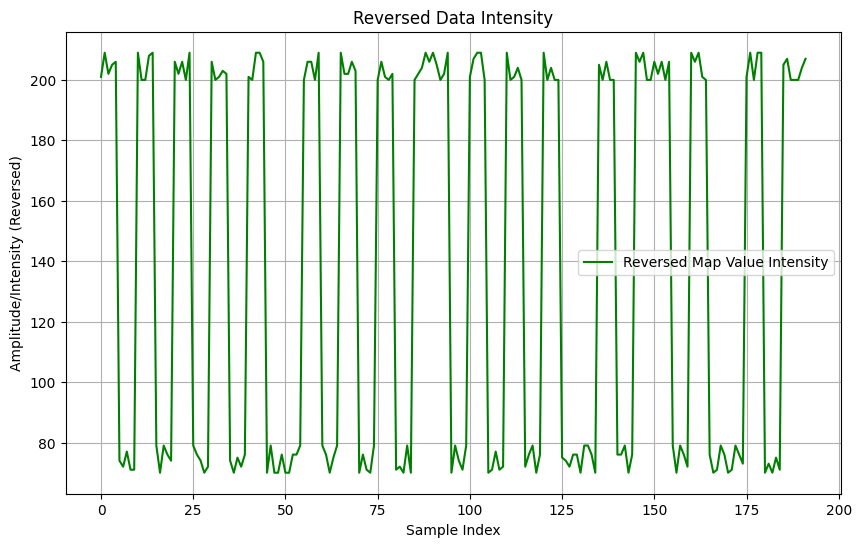

In [29]:
#Logika Klipping kedua - test
## Kode ini disamakan dengan logika RX-mapping-1019 ipynb
# Mapping baru dengan rentang nilai


# ------------------OFDM part - return 2nd mapping -------------------------------------------""

high_mapping = {
    200: (170, 177), 201: (178, 185), 202: (186, 193), 203: (194, 201),
    204: (202, 209), 205: (210, 217), 206: (218, 225), 207: (226, 233),
    208: (234, 241), 209: (242, 255)
}
low_mapping = {
    70: (45, 57), 71: (58, 65), 72: (66, 73), 73: (74, 81),
    74: (82, 89), 75: (90, 97), 76: (98, 105), 77: (106, 113),
    78: (114, 121), 79: (122, 129)
}
#------------------------------ Logika mapping 1019---------------------------
# Fungsi untuk membalikkan nilai berdasarkan rentang mapping
def reverse_map_value(value, mapping):
    for key, value_range in mapping.items():
        if value_range[0] <= value <= value_range[1]:
            return key
    return value

# Proses decoding dengan pembalikan mapping
decoded_data = []
for value in data_96:
    if 170 <= value <= 255:  # Cek apakah nilai dalam rentang high_mapping
        decoded_data.append(reverse_map_value(value, high_mapping))
    elif 45 <= value <= 129:  # Cek apakah nilai dalam rentang low_mapping
        decoded_data.append(reverse_map_value(value, low_mapping))
    else:
        decoded_data.append(value)
#------------------------------ Logika mapping 1019---------------------------

print("\nDecoded Data (after reverse 2nd-mapping(x)):", decoded_data)
print(f"Decoded Data (after reverse 2nd-mapping(x)): {len(decoded_data)}")

# Trimming the last 8 elements from decoded_data
KURANG8 = decoded_data[:-8]
print("\nOFDM after (x-8):", KURANG8)
print(f"Total data OFDM after (x-8): {len(KURANG8)}")

# OFDM that still store 200 data for OOK demapping
OFDM_signal_reconstructed = decoded_data
print("OFDM for OOK demapping", OFDM_signal_reconstructed)
print(f"OFDM_signal_reconstructed11: {len(OFDM_signal_reconstructed)}")
# ------------------OFDM part - return 2nd mapping -------------------------------------------""


# Rekonstruksi OOK signal dan OFDM data
OOK_signal_reconstructed = []
OFDM_signal_reconstructed = []

# Menentukan chunk size berdasarkan panjang data yang diterima dan panjang OOK yang diinginkan
chunk_size = len(data_96) // len(decoded_data)  # Tentukan ukuran chunk secara dinamis berdasarkan panjang data

# Proses rekonstruksi OOK dan OFDM dari data yang diterima
for i in range(0, len(decoded_data), chunk_size):
    chunk = decoded_data[i:i + chunk_size]
    # Menentukan bit OOK berdasarkan apakah nilai chunk lebih besar dari 200 (bit 1) atau 70 (bit 0)
    if all(value >= 200 for value in chunk):  # Bit 1
        OOK_signal_reconstructed.append(1)
        OFDM_signal_reconstructed.extend([value - 200 for value in chunk])
    elif all(value >= 70 for value in chunk):  # Bit 0
        OOK_signal_reconstructed.append(0)
        OFDM_signal_reconstructed.extend([value - 70 for value in chunk])
    else:
        print(f"Warning: Mixed chunk detected at index {i}!")

# OFDM part - return 2nd mapping -------------------------------------------

### Data for show the graph #OFDM for graph
print("__________________________________________")
print("\nReconstructed OFDM Signal(x):", OFDM_signal_reconstructed)
print(f"OFDM_signal_reconstructed(x): {len(OFDM_signal_reconstructed)}")

OFDM_signal_reconstructed = OFDM_signal_reconstructed[:-8]
print("OFDM_signal_reconstructed for Graph(x-8):", OFDM_signal_reconstructed)
print(f"TLength_OFDM_signal_reconstructed for Graph(x-8): {len(OFDM_signal_reconstructed)}")


## OOK part - for return the OOK maping value to real OOK  ------------------
def reduce_repeated_bits(ook_signal, repetition_threshold=5):
    modified_signal, count = [], 1
    
    for i in range(1, len(ook_signal)):
        if ook_signal[i] == ook_signal[i - 1]:
            count += 1
        else:
            modified_signal.extend([ook_signal[i - 1]] * (count // repetition_threshold if count >= repetition_threshold else count))
            count = 1
    
    modified_signal.extend([ook_signal[-1]] * (count // repetition_threshold if count >= repetition_threshold else count))
    return modified_signal

RX_Pure_OOK = reduce_repeated_bits(OOK_signal_reconstructed, 5)
print("__________________________________________")
print(f"\nTLength_Reconstructed OOK Signal based OFDM : {len(OOK_signal_reconstructed)}")
print("Reconstructed OOK Signal based OFDM :", OOK_signal_reconstructed)
print(f"TLength_Reconstructed OOK Signal Pure: {len(RX_Pure_OOK)}")
print("RX-side OOK signal:", RX_Pure_OOK)
print("__________________________________________")
RX_Pure_OOK = reduce_repeated_bits(OOK_signal_reconstructed, 5)


#Data OFDM yang sudah di slice :-8
print("\nOFDM_data_for_next_step =", KURANG8)
print(f"Tlength_OFDM total data: {len(KURANG8)}")

print("\nRX_PURE OFDM",OFDM_signal_reconstructed)
print(f"Tlength_RX_PURE OFDM: {len(OFDM_signal_reconstructed)}")

plt.figure(figsize=(10, 6))
plt.plot(KURANG8, label='Reversed Map Value Intensity', color='green')
plt.title('Reversed Data Intensity')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude/Intensity (Reversed)')
plt.grid(True)
plt.legend()
plt.show()

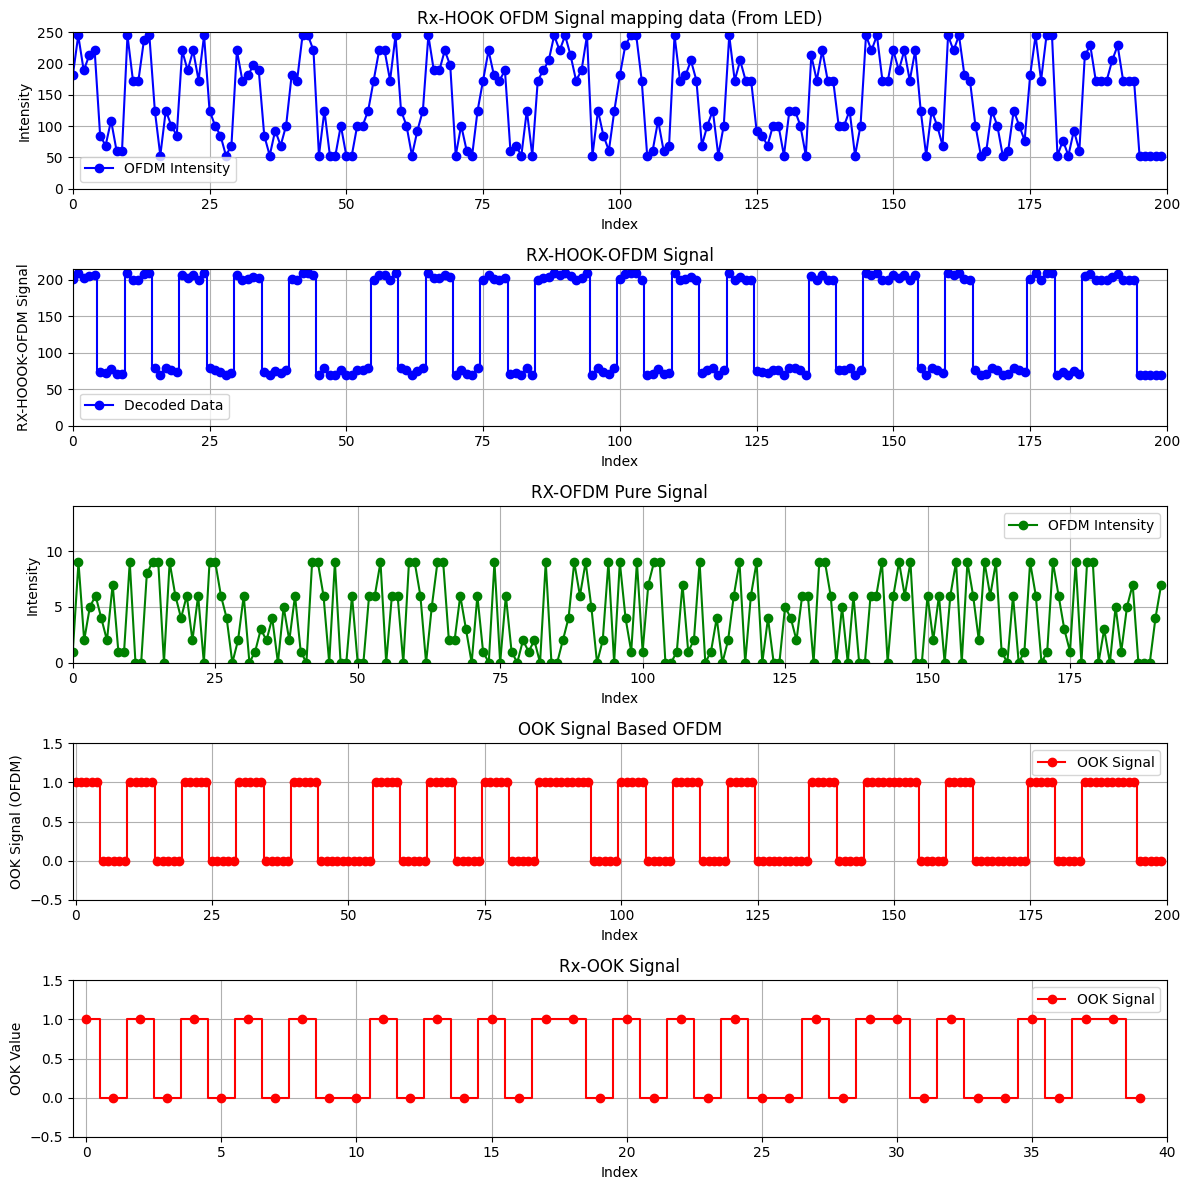

In [30]:
plt.figure(figsize=(12, 12))


# Subplot 5: Plot from LED intensity RX side 
plt.subplot(5, 1, 1)
plt.plot(range(len(data_96)), data_96, marker='o', linestyle='-', color='b', label="OFDM Intensity")
plt.ylim(0, max(data_96) + 5)  # Intensity range
plt.xlim(0, len(data_96))  # Data range
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.title('Rx-HOOK OFDM Signal mapping data (From LED)')
plt.grid(True)
plt.legend()

# Subplot 2: OFDM Signal Reconstructed
plt.subplot(5, 1, 2)
plt.step(range(len(decoded_data)), decoded_data, where='mid', linestyle='-', color='b', marker='o', label="Decoded Data")
plt.ylim(0, max(decoded_data) + 5)  # Intensity range
plt.xlim(0, len(decoded_data))  # Data range
plt.xlabel('Index')
plt.ylabel('RX-HOOOK-OFDM Signal')
plt.title('RX-HOOK-OFDM Signal')
plt.grid(True)
plt.legend()

# Subplot 3: Decoded Data OFDM
plt.subplot(5, 1, 3)
plt.plot(range(len(OFDM_signal_reconstructed)), OFDM_signal_reconstructed, marker='o', linestyle='-', color='g', label="OFDM Intensity")
plt.ylim(0, max(OFDM_signal_reconstructed) + 5)  # Intensity range
plt.xlim(0, len(OFDM_signal_reconstructed))  # Data range
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.title('RX-OFDM Pure Signal')
plt.grid(True)
plt.legend()

# Subplot 4: OOK Signal Based OFDM
plt.subplot(5, 1, 4)
plt.step(range(len(OOK_signal_reconstructed)), OOK_signal_reconstructed, where='mid', linestyle='-', color='r', marker='o', label="OOK Signal")
plt.ylim(-0.5, 1.5)  # Limit y-axis to 0-1.5
plt.xlim(-0.5, len(OOK_signal_reconstructed))  # Data range
plt.xlabel('Index')
plt.ylabel('OOK Signal (OFDM)')
plt.title('OOK Signal Based OFDM')
plt.grid(True)
plt.legend()

# Subplot 5: OOK Signal
plt.subplot(5, 1, 5)
plt.step(range(len(RX_Pure_OOK)), RX_Pure_OOK, where='mid', linestyle='-', color='r', marker='o', label="OOK Signal")
plt.ylim(-0.5, 1.5)  # Limit y-axis to 0-1.5
plt.xlim(-0.5, len(RX_Pure_OOK))  # Data range
plt.xlabel('Index')
plt.ylabel('OOK Value')
plt.title('Rx-OOK Signal')
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


combine_real_of_ofdm = OFDM_signal_reconstructed


In [31]:
import numpy as np

# Function to reverse the mapping (assuming it's the same as the one in the transmitter)
def reverse_mapping(received_data):
    return list(map(int, received_data.split(',')))

# Function to reverse the clipping process
def reverse_clip_signal(clipped_signal, alpha=0.5, percentile_value=85):
    # Assuming you know the value of A used during transmission
    # In practice, you would need to know how A was calculated (based on percentile of the biased signal)
    # This is a simplification because the clipping at the receiver might have cut off parts of the signal
    sigma_x_t = np.std(clipped_signal)
    b = alpha * sigma_x_t
    biased_signal = (clipped_signal / 20) - b  # Reverse the scaling and bias

    # Reverse the clipping: apply values above A to A
    A = np.percentile(biased_signal, percentile_value)  # Assuming we know the same percentile used
    restored_signal = np.clip(biased_signal, 0, A)  # Re-apply clipping

    return restored_signal

# Function to reverse the normalization (assuming it was normalized by rounding in transmitter)
def denormalize_signal(normalized_signal):
    return normalized_signal.astype(float)

# Input received data (example)
combine_real_of_ofdm = OFDM_signal_reconstructed

# Convert input list into a comma-separated string (to simulate the mapping process)
received_data = ', '.join(map(str, combine_real_of_ofdm))

# Reverse the mapping (this assumes the data was converted into a string at the transmitter)
received_signal = reverse_mapping(received_data)

# Apply the reverse clip signal function to the received signal (to reverse the bias and scaling)
received_signal_array = np.array(received_signal)
restored_signal = reverse_clip_signal(received_signal_array)

# Output the final restored signal
print(f"Restored Signal: {restored_signal}")


Restored Signal: [-1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948 -1.28201948
 -1.28201948 -1.28201948 -1.282019

In [32]:
restored_signal = np.array(OFDM_signal_reconstructed)
print("combine_real_of_ofdm:", restored_signal)

# Complex format 
# Add 0j to convert real numbers to complex numbers
complex_ofdm = restored_signal + 0j

# Print the complex array
print("Complex OFDM Symbols:")
print(complex_ofdm)

combine_real_of_ofdm: [1 9 2 5 6 4 2 7 1 1 9 0 0 8 9 9 0 9 6 4 6 2 6 0 9 9 6 4 0 2 6 0 1 3 2 4 0
 5 2 6 1 0 9 9 6 0 9 0 0 6 0 0 6 6 9 0 6 6 0 9 9 6 0 5 9 9 2 2 6 3 0 6 1 0
 9 0 6 1 0 2 1 2 0 9 0 0 2 4 9 6 9 5 0 2 9 0 9 4 1 9 1 7 9 9 0 0 1 7 1 2 9
 0 1 4 0 2 6 9 0 6 9 0 4 0 0 5 4 2 6 6 0 9 9 6 0 5 0 6 0 0 6 6 9 0 6 9 6 9
 0 0 6 2 6 0 6 9 0 9 6 2 9 6 9 1 0 6 0 1 9 6 0 1 9 6 3 1 9 0 9 9 0 3 0 5 1
 5 7 0 0 0 4 7]
Complex OFDM Symbols:
[1.+0.j 9.+0.j 2.+0.j 5.+0.j 6.+0.j 4.+0.j 2.+0.j 7.+0.j 1.+0.j 1.+0.j
 9.+0.j 0.+0.j 0.+0.j 8.+0.j 9.+0.j 9.+0.j 0.+0.j 9.+0.j 6.+0.j 4.+0.j
 6.+0.j 2.+0.j 6.+0.j 0.+0.j 9.+0.j 9.+0.j 6.+0.j 4.+0.j 0.+0.j 2.+0.j
 6.+0.j 0.+0.j 1.+0.j 3.+0.j 2.+0.j 4.+0.j 0.+0.j 5.+0.j 2.+0.j 6.+0.j
 1.+0.j 0.+0.j 9.+0.j 9.+0.j 6.+0.j 0.+0.j 9.+0.j 0.+0.j 0.+0.j 6.+0.j
 0.+0.j 0.+0.j 6.+0.j 6.+0.j 9.+0.j 0.+0.j 6.+0.j 6.+0.j 0.+0.j 9.+0.j
 9.+0.j 6.+0.j 0.+0.j 5.+0.j 9.+0.j 9.+0.j 2.+0.j 2.+0.j 6.+0.j 3.+0.j
 0.+0.j 6.+0.j 1.+0.j 0.+0.j 9.+0.j 0.+0.j 6.+0.j 1.+0.j 0.+0.j 2.+0

In [33]:
# Remove DC Bias
ofdm_symbols_without_bias = complex_ofdm 

## perform reshape
ofdm_symbols_reshaped = ofdm_symbols_without_bias.reshape(-1, 16)
print(ofdm_symbols_reshaped)


[[1.+0.j 9.+0.j 2.+0.j 5.+0.j 6.+0.j 4.+0.j 2.+0.j 7.+0.j 1.+0.j 1.+0.j
  9.+0.j 0.+0.j 0.+0.j 8.+0.j 9.+0.j 9.+0.j]
 [0.+0.j 9.+0.j 6.+0.j 4.+0.j 6.+0.j 2.+0.j 6.+0.j 0.+0.j 9.+0.j 9.+0.j
  6.+0.j 4.+0.j 0.+0.j 2.+0.j 6.+0.j 0.+0.j]
 [1.+0.j 3.+0.j 2.+0.j 4.+0.j 0.+0.j 5.+0.j 2.+0.j 6.+0.j 1.+0.j 0.+0.j
  9.+0.j 9.+0.j 6.+0.j 0.+0.j 9.+0.j 0.+0.j]
 [0.+0.j 6.+0.j 0.+0.j 0.+0.j 6.+0.j 6.+0.j 9.+0.j 0.+0.j 6.+0.j 6.+0.j
  0.+0.j 9.+0.j 9.+0.j 6.+0.j 0.+0.j 5.+0.j]
 [9.+0.j 9.+0.j 2.+0.j 2.+0.j 6.+0.j 3.+0.j 0.+0.j 6.+0.j 1.+0.j 0.+0.j
  9.+0.j 0.+0.j 6.+0.j 1.+0.j 0.+0.j 2.+0.j]
 [1.+0.j 2.+0.j 0.+0.j 9.+0.j 0.+0.j 0.+0.j 2.+0.j 4.+0.j 9.+0.j 6.+0.j
  9.+0.j 5.+0.j 0.+0.j 2.+0.j 9.+0.j 0.+0.j]
 [9.+0.j 4.+0.j 1.+0.j 9.+0.j 1.+0.j 7.+0.j 9.+0.j 9.+0.j 0.+0.j 0.+0.j
  1.+0.j 7.+0.j 1.+0.j 2.+0.j 9.+0.j 0.+0.j]
 [1.+0.j 4.+0.j 0.+0.j 2.+0.j 6.+0.j 9.+0.j 0.+0.j 6.+0.j 9.+0.j 0.+0.j
  4.+0.j 0.+0.j 0.+0.j 5.+0.j 4.+0.j 2.+0.j]
 [6.+0.j 6.+0.j 0.+0.j 9.+0.j 9.+0.j 6.+0.j 0.+0.j 5.+0.j 0.+0.j

In [34]:
fft_ofdm_symbols = np.fft.fft(ofdm_symbols_reshaped, axis=1)

# Print the FFT result for each OFDM symbol
print("FFT of OFDM Symbols:")
print(fft_ofdm_symbols)
fft_ofdm_symbols.shape

FFT of OFDM Symbols:
[[ 73.         +0.j          12.68294622 +0.67951481j
    2.36396103 +9.19238816j  -4.48808147+10.73890117j
  -14.         -1.j           4.48808147-21.0600887j
  -10.36396103 +9.19238816j -12.68294622 -7.11947506j
  -13.         +0.j         -12.68294622 +7.11947506j
  -10.36396103 -9.19238816j   4.48808147+21.0600887j
  -14.         +1.j          -4.48808147-10.73890117j
    2.36396103 -9.19238816j  12.68294622 -0.67951481j]
 [ 69.         +0.j          -9.         -6.j
    7.24264069-15.55634919j  -9.         +6.j
   -9.        -14.j          -9.         -6.j
   -1.24264069-15.55634919j  -9.         +6.j
    9.         +0.j          -9.         -6.j
   -1.24264069+15.55634919j  -9.         +6.j
   -9.        +14.j          -9.         -6.j
    7.24264069+15.55634919j  -9.         +6.j        ]
 [ 57.         +0.j          -6.59847292+12.45534405j
  -10.36396103 -3.53553391j   8.09074503 -4.41542086j
  -14.        +11.j          -8.09074503-12.21441073j
    2.363

(12, 16)

In [35]:
import numpy as np

def reverse_hermitian_symmetry_matrix(hermitian_symmetric_matrix):

    # print("Hermitian Data \n",hermitian_symmetric_matrix)

    """Recover the QAM symbols from a matrix of Hermitian-symmetric OFDM symbols.
    
    Each row of the input matrix represents a 16-subcarrier OFDM symbol.
    """
    num_rows = hermitian_symmetric_matrix.shape[0]  # Get the number of rows
    qam_symbols_matrix = np.zeros((num_rows, 7), dtype=complex)  # Initialize the output array
    
    for i in range(num_rows):
        # Extract the original QAM symbols from each row
        qam_symbols_matrix[i, :] = hermitian_symmetric_matrix[i, 1:8]
    
    return qam_symbols_matrix

qam_symbols_matrix = reverse_hermitian_symmetry_matrix(fft_ofdm_symbols)

# # Print the recovered QAM symbols for each row
print("QAM after Hermitian:")
print(qam_symbols_matrix)

# Concatenate all rows into a single row
QAM_4 = np.concatenate(qam_symbols_matrix)

# # Print the concatenated row
# print("QAM Value in Rx-side:")
# print(QAM_4)


QAM after Hermitian:
[[ 12.68294622 +0.67951481j   2.36396103 +9.19238816j
   -4.48808147+10.73890117j -14.         -1.j
    4.48808147-21.0600887j  -10.36396103 +9.19238816j
  -12.68294622 -7.11947506j]
 [ -9.         -6.j           7.24264069-15.55634919j
   -9.         +6.j          -9.        -14.j
   -9.         -6.j          -1.24264069-15.55634919j
   -9.         +6.j        ]
 [ -6.59847292+12.45534405j -10.36396103 -3.53553391j
    8.09074503 -4.41542086j -14.        +11.j
   -8.09074503-12.21441073j   2.36396103 -3.53553391j
    6.59847292-19.34364583j]
 [-11.18871426 +6.86437192j -11.82842712 +6.17157288j
   10.59229399 -8.18871426j  12.        -10.j
   -9.86437192+10.5392078j   -6.17157288-11.82842712j
  -13.5392078 +13.59229399j]
 [  7.66965019 -3.72065528j   5.77817459-10.29289322j
   14.86316463 -5.52995272j  11.         -3.j
   11.03633031-15.42944766j  -9.77817459+11.70710678j
   -1.56914513-13.62015022j]
 [-14.50914923 +9.46594943j   7.17157288 -9.3137085j
  -15.19053

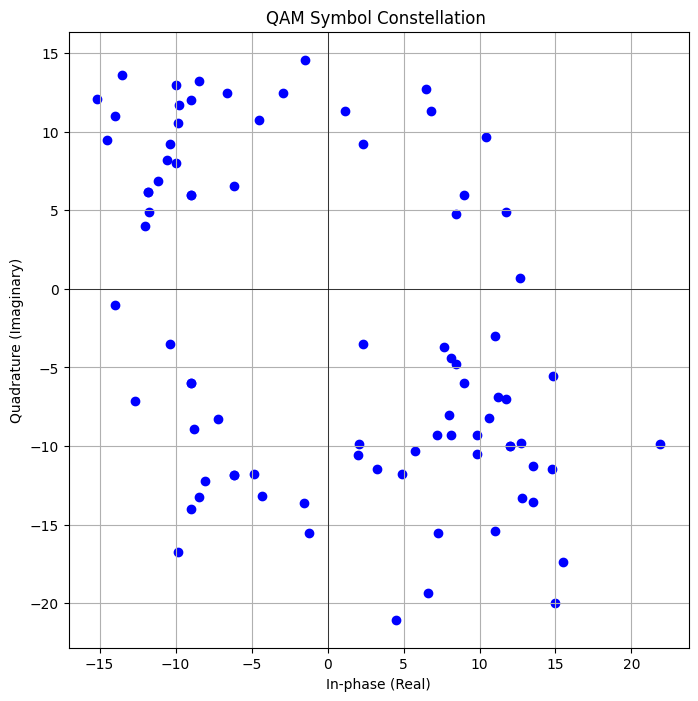

In [36]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the constellation diagram
plt.figure(figsize=(8, 8))
plt.scatter(QAM_4.real, QAM_4.imag, color='blue', marker='o')

# Add grid lines and labels
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("QAM Symbol Constellation ")
plt.xlabel("In-phase (Real)")
plt.ylabel("Quadrature (Imaginary)")

# Show the plot
plt.show()

In [37]:
def qam4_to_binary(symbols):
    ##"""Convert QAM-16 symbols back to a binary list, replace unmatched symbols with '1010'."""
    """Convert QAM-4 symbols back to a binary list, replace unmatched symbols with '1010'."""
    binary_list = []
    for RI in symbols:
        R = np.real(RI)
        I = np.imag(RI)

        if R >=0 and I>=0 :
            binary_list.append('00')
        elif R < 0 and I>=0 :
            binary_list.append('10')
        elif R < 0 and I < 0 :
            binary_list.append('11')
        elif R >=0 and I< 0 :
            binary_list.append('01')
        
    # Join the list of binary strings and convert them into individual bits
    return binary_list

binary_output = qam4_to_binary(QAM_4)
print("Binary Output\n:", binary_output)
# Convert list to a single string
binary_string = ''.join(binary_output)

print(binary_string)


Binary Output
: ['00', '00', '10', '11', '01', '10', '11', '11', '01', '10', '11', '11', '11', '10', '10', '11', '01', '10', '11', '01', '01', '10', '10', '01', '01', '10', '11', '10', '01', '01', '01', '01', '01', '10', '11', '10', '01', '10', '10', '01', '01', '11', '01', '10', '01', '10', '01', '01', '01', '11', '00', '10', '01', '11', '00', '11', '01', '10', '10', '01', '01', '11', '01', '00', '01', '11', '10', '01', '01', '10', '00', '01', '11', '01', '10', '00', '01', '01', '01', '10', '10', '00', '00', '01']
000010110110111101101111111010110110110101101001011011100101010101101110011010010111011001100101011100100111001101101001011101000111100101100001110110000101011010000001


In [38]:
import reedsolo

# Helper function to convert a binary string to bytes
def binary_to_bytes(binary_str):
    return bytes(int(binary_str[i:i+8], 2) for i in range(0, len(binary_str), 8))

# Helper function to convert bytes back to binary string
def bytes_to_binary(byte_data):
    return ''.join(format(byte, '08b') for byte in byte_data)

# Initialize the Reed-Solomon codec
n = 15
k = 11
rs = reedsolo.RSCodec(n - k)
# Convert binary string to bytes
binary_bytes = binary_to_bytes(binary_string)

# Introduce errors in the binary data (e.g., flip some bits manually or corrupt the data)
# Simulating a corrupted version (can flip specific bits if desired)
corrupted_bytes = binary_bytes

# Decoding the corrupted data (and correcting errors)
decoded_tuple = rs.decode(corrupted_bytes)

# Extract the corrected message (first element of the tuple)
corrected_message = decoded_tuple[0]

# Convert the corrected bytes back to binary
decoded_binary = bytes_to_binary(corrected_message)

print(f"Original Binary Data:\n {binary_string}")
print(f"Corrected Binary Data (15,11):\n {decoded_binary}")


Original Binary Data:
 000010110110111101101111111010110110110101101001011011100101010101101110011010010111011001100101011100100111001101101001011101000111100101100001110110000101011010000001
Corrected Binary Data (15,11):
 0100101101101111011011110110101101101101011010010110111001010101011011100110100101110110011001010111001001110011011010010111010001111001


In [39]:
def bits_to_string(bits):
    """Convert a list of bits back to a string."""
    chars = [chr(int(''.join(map(str, bits[i:i + 8])), 2)) for i in range(0, len(bits), 8)]
    return ''.join(chars)

In [40]:
def bits_to_string(bits):
    """Convert a list of bits back to a string."""
    # Convert each 8-bit chunk into a character
    chars = [chr(int(''.join(map(str, bits[i:i + 8])), 2)) for i in range(0, len(bits), 8)]
    return ''.join(chars)

# The corrected binary data
# corrected_binary_data = '01001111011100100111010001101000011011110110011101101111011011100110000101101100001000000100011001110010011001010111000101110101011001010110111001100011011110010010000001000100011010010111011001101001011100110110100101101111011011100010000001001101011101010110110001110100011010010111011001101111011011100110011100100000001010000100111101000110010001000100110100101001'

# Convert the binary string to a list of integers (0s and 1s)
corrected_bits = [int(bit) for bit in decoded_binary]

# Convert the bits to the original string
decoded_message = bits_to_string(corrected_bits)


from datetime import datetime
now = datetime.now()
current_time = now.strftime("%Y-%m-%d %H:%M:%S")

print(f"Decoded message: {decoded_message}")

print("Date/time:", current_time)

Decoded message: KookminUniversity
Date/time: 2024-12-23 15:41:09


#kode dibawah adalah second code untuk jaga jaga dibagian mapping data ~~~ untuk klipping basic

# RX Demodulated Data for OOK

In [41]:

#RX demodulated_signal

# modulated_signal = [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
# 1. OOK Demodulation
def ook_demodulation(RX_Pure_OOK):
    # Mengubah sinyal OOK kembali menjadi bit stream: 1 -> ON, 0 -> OFF
    return ''.join('1' if bit == 1 else '0' for bit in RX_Pure_OOK)

# 2. Remove Preamble
def remove_preamble(encoded_bits, preamble="10101010"):
    # Menghapus preamble yang ditambahkan sebelumnya
    return encoded_bits[len(preamble):]

# 3. RLL Decoding (Manchester)
def manchester_decoding(data_bits):
    decoded_bits = []
    # Setiap dua bit pada data adalah hasil Manchester encoding
    for i in range(0, len(data_bits), 2):
        if data_bits[i:i+2] == "10":
            decoded_bits.append('1')
        elif data_bits[i:i+2] == "01":
            decoded_bits.append('0')
    return ''.join(decoded_bits)

# 4. FEC Decoder (Hamming 8,4)
def hamming_decoder(encoded_bits):
    decoded_bits = []
    for i in range(0, len(encoded_bits), 8):
        # Ambil grup 8 bit yang sudah diterima
        group = encoded_bits[i:i+8]
        p1, p2, d1, p3, d2, d3, d4, p4 = group
        
        # Hitung syndrome untuk perbaikan bit error
        s1 = (int(d1) + int(d2) + int(d4) + int(p1)) % 2
        s2 = (int(d1) + int(d3) + int(d4) + int(p2)) % 2
        s3 = (int(d2) + int(d3) + int(d4) + int(p3)) % 2
        
        # Tentukan posisi bit yang error
        error_pos = s1 * 1 + s2 * 2 + s3 * 4
        
        if error_pos != 0:
            # Perbaiki bit yang error (posisi dihitung dari 1)
            error_pos -= 1  # Mengubah ke index 0
            group = list(group)
            group[error_pos] = '1' if group[error_pos] == '0' else '0'  # Membalikkan bit error

        # Ambil data yang terdekode (d1, d2, d3, d4)
        decoded_bits.append(group[2])
        decoded_bits.append(group[4])
        decoded_bits.append(group[5])
        decoded_bits.append(group[6])
    
    return ''.join(decoded_bits)

# Fungsi untuk mengubah biner menjadi karakter yang dapat dibaca
def binary_to_text(binary_string):
    # Pecah string biner menjadi blok 8-bit dan konversi setiap blok ke karakter
    n = 8  # Setiap karakter adalah 8-bit
    text = ''
    for i in range(0, len(binary_string), n):
        byte = binary_string[i:i+n]
        text += chr(int(byte, 2))  # Konversi byte biner ke karakter
    return text


# Main Receiver Function
def receiver(RX_Pure_OOK):
    # Step 1: OOK Demodulation
    demodulated_signal = ook_demodulation(RX_Pure_OOK)
    print(f"Demodulated Signal: {demodulated_signal}")
    
    # Step 2: Remove Preamble
    signal_without_preamble = remove_preamble(demodulated_signal)
    print(f"Signal without Preamble: {signal_without_preamble}")
    
    # Step 3: RLL Decoding (Manchester)
    manchester_decoded_bits = manchester_decoding(signal_without_preamble)
    print(f"Manchester Decoded Bits: {manchester_decoded_bits}")
    
    # Step 4: FEC Decoding (Hamming 8,4)
    decoded_bits = hamming_decoder(manchester_decoded_bits)
    print(f"Decoded Bits (After Hamming): {decoded_bits}")
    

    # Convert decoded bits to readable text
    readable_text = binary_to_text(decoded_bits)
    print("OOK OUTPUT")
    print(f"Drone Numbers {readable_text}")

    return decoded_bits



from datetime import datetime
now = datetime.now()
current_time = now.strftime("%Y-%m-%d %H:%M:%S")

# Call the Receiver function
decoded_bits = receiver(RX_Pure_OOK)
print("Date/time:", current_time)


Demodulated Signal: 1010101010010101011010101001011010010110
Signal without Preamble: 10010101011010101001011010010110
Manchester Decoded Bits: 1000011110011001
Decoded Bits (After Hamming): 00110100
OOK OUTPUT
Drone Numbers 4
Date/time: 2024-12-23 15:41:09
